## Observations and Insights 

1. There were 1,893 data points with 5 of those data points being duplicates.
2. Capomulin and Ramicane had the most time obervations and had a even gender representation with 50.7% & 49.7% for male and female, respectively.
3. Of the four drugs (Capomulin, Ramicane, Infubinol, Ceftamin) reviewed Infubinol was the only one that had an outlier. Mouse c326 had a value of 36.321346 which is below the lower bound of 36.83290494999999.
4. When looking at the chart of 'mouse b128', Capomulin showed a clear reduction in tumor size over time. Overall both Capomulin and Ramicane showed the greatest improvements in tumor size.
5. With an r-value of 0.8767060403658119, the data indicate there is a strong positive correlation between mouse weight and the size of the tumor. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")


# Display the data table for preview
study_data_complete.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [2]:
study_data_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [3]:
# Checking the number of mice.

len(study_data_complete["Mouse ID"].unique())


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_data_complete[study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"])]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
clean_complete_df = study_data_complete.dropna(how="any")
clean_complete_df.count()


Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_complete_df = study_data_complete.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_complete_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_complete_df["Mouse ID"].unique())



249

## Summary Statistics

In [8]:
regimen_cnts = clean_complete_df['Drug Regimen'].value_counts()
regimen_cnts.describe()

count     10.000000
mean     188.800000
std       22.899782
min      156.000000
25%      178.750000
50%      181.500000
75%      187.500000
max      230.000000
Name: Drug Regimen, dtype: float64

In [9]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
grouped_regimen_df = clean_complete_df.groupby(['Drug Regimen', 'Timepoint'])

grouped_regimen_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1877,g570,45,70.492788,2,Propriva,Male,16,29
1880,j755,45,69.563621,1,Naftisol,Male,23,27
1883,t718,45,63.423695,4,Placebo,Female,10,30
1884,o562,45,72.455421,2,Propriva,Female,4,25


In [10]:
# For each drug in drug_regimen; calculate mean, meadian, variance, standard deviation, and SEM of tumor volume

tumor_avg = grouped_regimen_df['Tumor Volume (mm3)'].mean()

tumor_median = grouped_regimen_df['Tumor Volume (mm3)'].median()

tumor_var = grouped_regimen_df['Tumor Volume (mm3)'].var()

tumor_std = grouped_regimen_df['Tumor Volume (mm3)'].std()

tumor_sem = grouped_regimen_df['Tumor Volume (mm3)'].sem()




In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the
# tumor volume for each regimen.
regimen_summary_df = pd.DataFrame({
    "Tumor Volume (mm3)-Average": tumor_avg,
    "Tumor Volume (mm3)-Median": tumor_median,
    "Tumor Volume (mm3)-Variance": tumor_var,
    "Tumor Volume (mm3)-Standard Deviation": tumor_std,
    "Tumor Volume (mm3)-Standard Error": tumor_sem
})

regimen_summary_df

Tumor Volume (mm3)-Average  Tumor Volume (mm3)-Median  \
Drug Regimen Timepoint                                                          
Capomulin    0                           45.000000                  45.000000   
             5                           44.266086                  45.597064   
             10                          43.084291                  43.421014   
             15                          42.064317                  42.798160   
             20                          40.716325                  40.716428   
...                                            ...                        ...   
Zoniferol    25                          55.432935                  55.676604   
             30                          57.713531                  57.419744   
             35                          60.089372                  60.365832   
             40                          62.916692                  62.274543   
             45                          65.960888                  65.684689   

                        Tumor Volume (mm3)-Variance  \
Drug Regimen Timepoint                                
Capomulin    0                             0.000000   
             5                             5.030889   
             10                           12.344133   
             15                           16.878693   
             20                           19.035028   
...                                             ...   
Zoniferol    25                            5.808348   
             30                            9.601024   
             35                           10.876760   
             40                           13.958456   
             45                           14.100301   

                        Tumor Volume (mm3)-Standard Deviation  \
Drug Regimen Timepoint                                          
Capomulin    0                                       0.000000   
             5                                       2.242964   
             10                                      3.513422   
             15                                      4.108369   
             20                                      4.362915   
...                                                       ...   
Zoniferol    25                                      2.410052   
             30                                      3.098552   
             35                                      3.297993   
             40                                      3.736102   
             45                                      3.755037   

                        Tumor Volume (mm3)-Standard Error  
Drug Regimen Timepoint                                     
Capomulin    0                                   0.000000  
             5                                   0.448593  
             10                                  0.702684  
             15                                  0.838617  
             20                                  0.909731  
...                                                   ...  
Zoniferol    25                                  0.602513  
             30                                  0.800043  
             35                                  0.881426  
             40                                  0.998515  
             45                                  1.003576  

[100 rows x 5 columns]

In [12]:
# Using the aggregation method, produce the same summary statistics in a single line

single_sum_stat_line = grouped_regimen_df.agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})
single_sum_stat_line


Tumor Volume (mm3)                                  \
                                     mean     median        var       std   
Drug Regimen Timepoint                                                      
Capomulin    0                  45.000000  45.000000   0.000000  0.000000   
             5                  44.266086  45.597064   5.030889  2.242964   
             10                 43.084291  43.421014  12.344133  3.513422   
             15                 42.064317  42.798160  16.878693  4.108369   
             20                 40.716325  40.716428  19.035028  4.362915   
...                                   ...        ...        ...       ...   
Zoniferol    25                 55.432935  55.676604   5.808348  2.410052   
             30                 57.713531  57.419744   9.601024  3.098552   
             35                 60.089372  60.365832  10.876760  3.297993   
             40                 62.916692  62.274543  13.958456  3.736102   
             45                 65.960888  65.684689  14.100301  3.755037   

                                  
                             sem  
Drug Regimen Timepoint            
Capomulin    0          0.000000  
             5          0.448593  
             10         0.702684  
             15         0.838617  
             20         0.909731  
...                          ...  
Zoniferol    25         0.602513  
             30         0.800043  
             35         0.881426  
             40         0.998515  
             45         1.003576  

[100 rows x 5 columns]

## Bar and Pie Charts

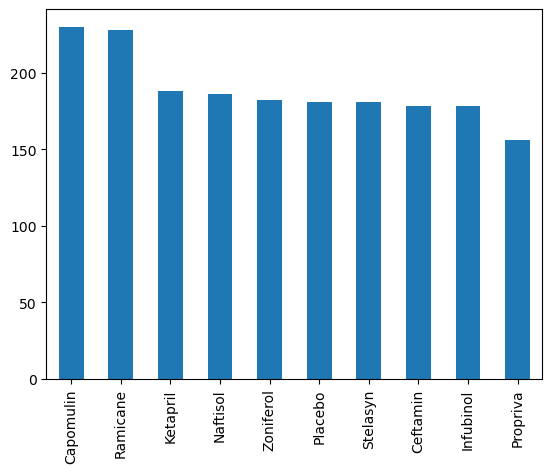

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

regimen_cnts.plot(kind="bar")

plt.show()


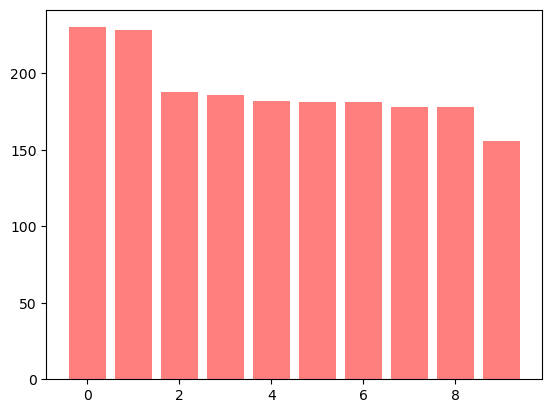

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(regimen_cnts))
# tick_locations = for value in x_axis
plt.bar(x_axis, regimen_cnts, color='r', alpha=0.5, align="center")

plt.show()


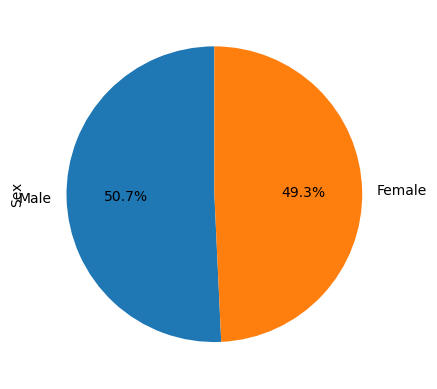

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_distribution = clean_complete_df['Sex'].value_counts()
sex_distribution

sex_distribution.plot(kind="pie", autopct='%1.1f%%', startangle=90)

plt.show()


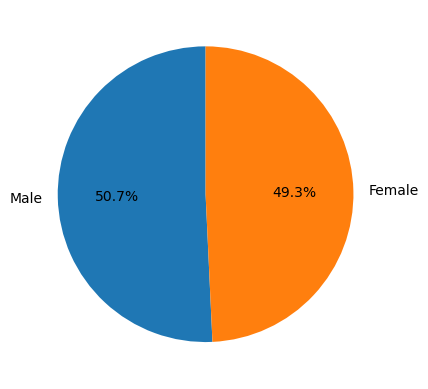

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Male', 'Female']

plt.pie(sex_distribution, labels=labels, autopct='%1.1f%%',
        startangle=90)

plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

grouped_mouse_df = clean_complete_df.groupby(['Mouse ID'])

max_timepoint = grouped_mouse_df['Timepoint'].max()
max_timepoint

# Merge clean_complete & max_timepoint to get the tumor volume at the last timepoint
merged_mouse_df = pd.merge(max_timepoint, clean_complete_df, how="left", on=["Mouse ID", "Timepoint"])

# Display the data table for preview
merged_mouse_df.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
5,a401,45,66.794156,4,Zoniferol,Female,8,25
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
8,a457,10,49.783419,0,Ketapril,Female,11,30
9,a492,45,60.122011,1,Stelasyn,Male,20,25


In [18]:
# Put treatments into a list for Capomulin, Ramicane, Infubinol, and Ceftamin 'for loop
# (and later for plot labels)'
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers in tumor volume
# Locate the rows which contain mice on each drug and get the tumor volumes
for regimen in regimens:
    filtered_df = merged_mouse_df.loc[merged_mouse_df['Drug Regimen'] == regimen]
    quartiles = filtered_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outlier_tumor = filtered_df.loc[(filtered_df['Tumor Volume (mm3)'] < lower_bound) | 
                                    (filtered_df['Tumor Volume (mm3)'] > upper_bound)]
    
    print("----------------------------------------------------------------------------")
    print(f"For the Drug Regimen, {regimen}, the quartiles and median are as follows...")
    print("----------------------------------------------------------------------------")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]} ")
    
    
    # add subset 
    tumor_vol_data.append(filtered_df['Tumor Volume (mm3)'])
    
    print(f'For Drug Regimen, {regimen}, the outliers are {outlier_tumor}')


----------------------------------------------------------------------------
For the Drug Regimen, Capomulin, the quartiles and median are as follows...
----------------------------------------------------------------------------
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.1251644 
For Drug Regimen, Capomulin, the outliers are Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
----------------------------------------------------------------------------
For the Drug Regimen, Ramicane, the quartiles and median are as follows...
----------------------------------------------------------------------------
Values below 17.912664470000003 could be outliers.
Va

## Line and Scatter Plots

In [19]:
# Generate a line plot of tumor volume vs. time point for A single mouse treated with Capomulin
# Filter merged_mouse_df for only Capomulin using .loc
capomulin_only = merged_mouse_df.loc[(merged_mouse_df["Drug Regimen"] == 'Capomulin')]

# Goup Capomulin data by the most recent timepoint (e.g. the max timepoint)
capomulin_only_max = capomulin_only.groupby("Mouse ID").max()["Timepoint"]

# Create a DataFrame of the Capomulin data grouped by the most recent timepoint (max) per mouse
capomulin_only_df = pd.DataFrame(capomulin_only_max)
capomulin_merge_df = pd.merge(capomulin_only_df, merged_mouse_df, on=("Mouse ID", "Timepoint"), how="left")
capomulin_merge_df.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
5,i557,45,47.685963,1,Capomulin,Female,1,24
6,i738,45,37.311846,2,Capomulin,Female,23,20
7,j119,45,38.125164,1,Capomulin,Female,7,23
8,j246,35,38.753265,1,Capomulin,Female,21,21
9,l509,45,41.483008,3,Capomulin,Male,17,21


In [20]:
# Filter for only 'Mouse ID' == b128 (randomly picked first mouse)
b_128_df = clean_complete_df.loc[clean_complete_df['Mouse ID'] == 'b128',:]

# Make sure data is coming out as expected
b_128_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22


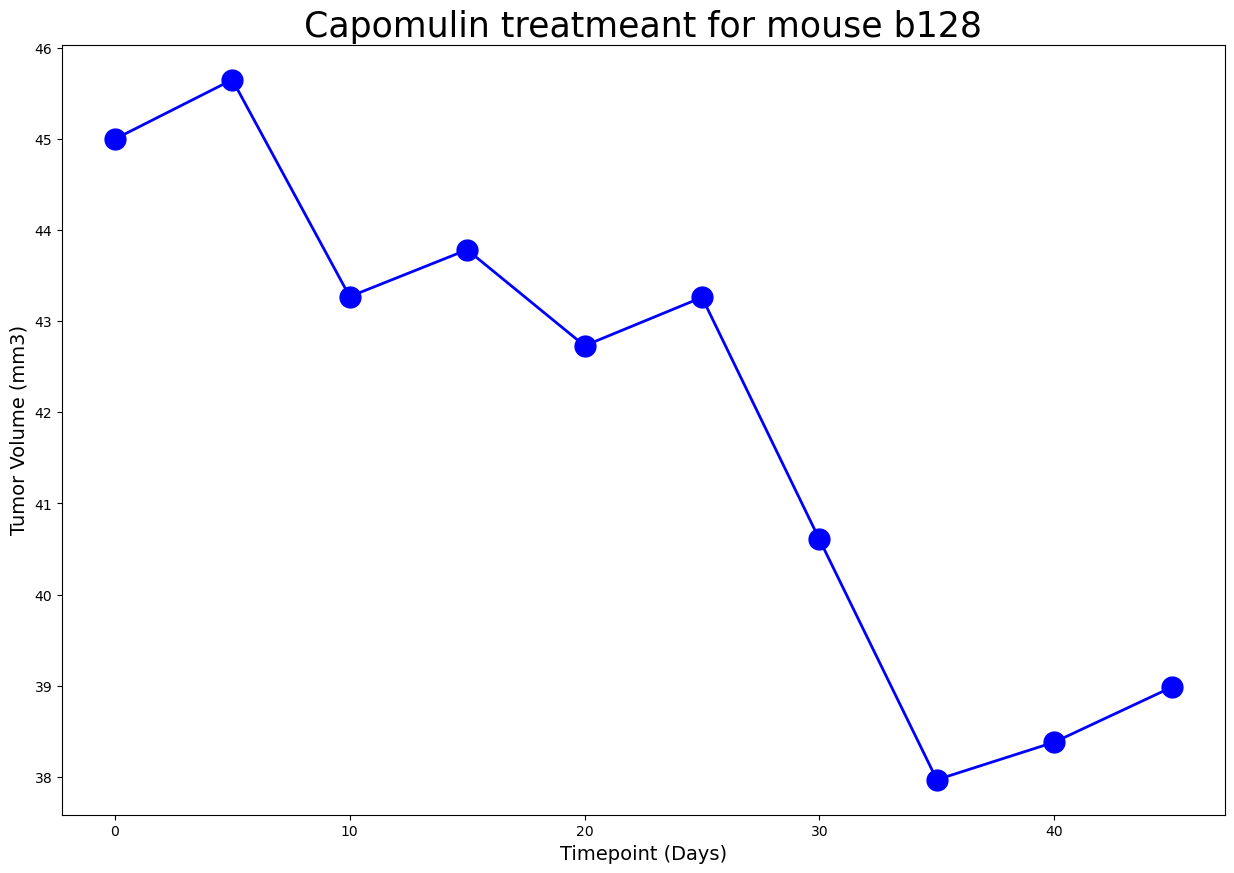

In [21]:
# Generate line plot of tumor volume vs time point
# Place data points to be graphed in their respective variables (tum_vol = y_axis)
x_axis = b_128_df['Timepoint']
tum_vol = b_128_df['Tumor Volume (mm3)']

# Create the chart parameters and format the appropriate titles
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant for mouse b128',fontsize =25)
plt.plot(x_axis, tum_vol,linewidth=2, markersize=15,marker="o",color="blue")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)

# Send an output of the chart image to a folder of chart images
plt.savefig(r"C:\Users\z0042xeh\Desktop\Georgia Tech\02-Homework\05-Matplotlib\Instructions\Pymaceuticals\Chart Images\Cap_b128",
            bbox_inches = "tight")

# Display the chart
plt.show()

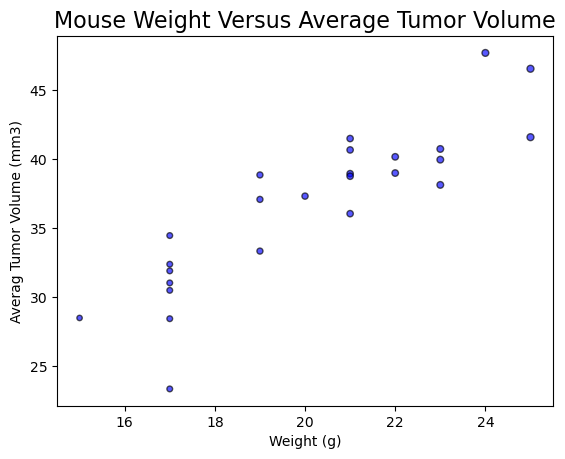

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Create a variable to hold the averages of Capomulin data
avg_cap_df = capomulin_only.groupby(["Mouse ID"]).mean()
scatter_x_axis = avg_cap_df['Weight (g)']
scatter_y_axis = avg_cap_df['Tumor Volume (mm3)']

# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
marker_size=15
plt.scatter(scatter_x_axis, scatter_y_axis, 
            marker="o", 
            facecolors="blue", 
            edgecolors="black",
            s=scatter_x_axis, 
            alpha=.65)
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =16)
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =10)
plt.savefig(r"C:\Users\z0042xeh\Desktop\Georgia Tech\02-Homework\05-Matplotlib\Instructions\Pymaceuticals\Chart Images\weight_vs_avg_tum_vol", 
            bbox_inches = "tight")
plt.show()

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Place correlation coefficient into variable
corr=round(st.pearsonr(avg_cap_df['Weight (g)'],avg_cap_df['Tumor Volume (mm3)'])[0],2)

# Print correlation coefficient 
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {corr}")



The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.88


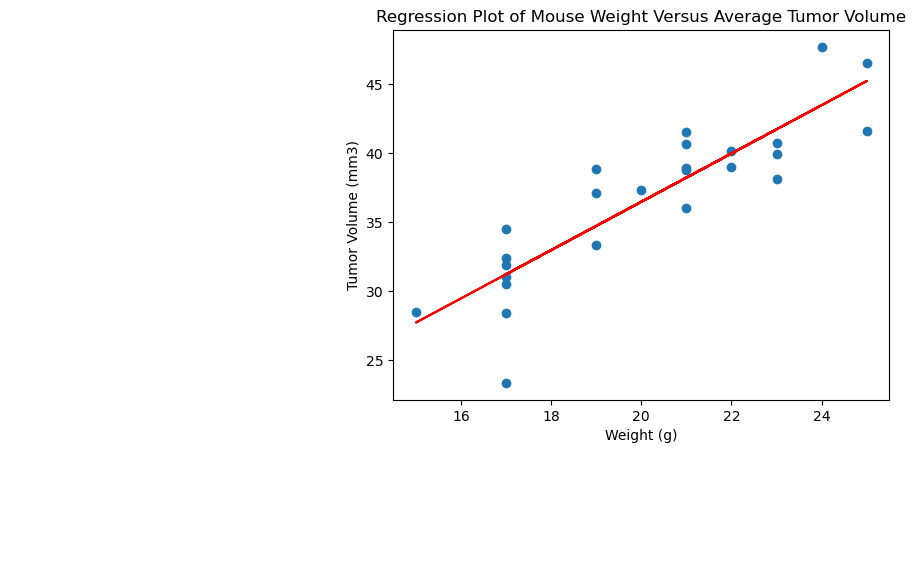

slope:1.750468228958504
intercept:1.4481469525549002
rvalue (Correlation coefficient):0.8767060403658119
pandas (Correlation coefficient):0.88
stderr:0.20026513236453639
The r-squared is: 0.7686134812139006
y = 1.75x + 1.45


In [24]:
# Import scipy.stats to import the linregress module for the linear regression modeling
from scipy.stats import linregress

# Add the linear regression equation and line to plot
lin_x_axis = avg_cap_df['Weight (g)']
lin_y_axis = avg_cap_df['Tumor Volume (mm3)']

# Perform the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(lin_x_axis, lin_y_axis)
regress_values = lin_x_axis * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data along with the fitted line:
plt.scatter(lin_x_axis,lin_y_axis)
plt.plot(lin_x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume',fontsize =12)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
ax1.annotate(line_eq, xy=(10, 20), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',
             horizontalalignment='right', verticalalignment='top',fontsize=10,color="red")
plt.show()

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

print(f"The r-squared is: {rvalue**2}")

print(line_eq)
